In [1]:
%pylab inline
import pandas as pd
from matplotlib.patches import Ellipse
from astropy.constants import c,h,k_B,au,G
import pickle as pickle

Populating the interactive namespace from numpy and matplotlib


### Re-define your data and (output) figure directories here:

In [2]:
data_dir='/Users/csalyk/Dropbox/ASTR230_lecture_notes/Figure_notebooks/data/'
fig_dir='/Users/csalyk/Dropbox/ASTR230_lecture_notes/Manuscript/Figures/'

### Define default plot parameters

In [3]:
rcParams['axes.linewidth'] = 2 # set the value globally
plt.rc('font', family='serif')

## Figure 8.1: Ball rolling up hill

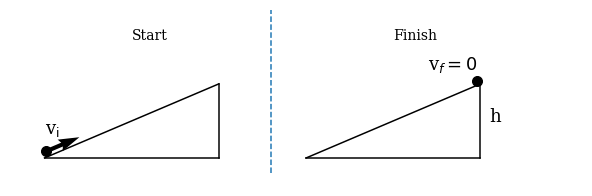

In [4]:
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot([0,10],[0,5],color='k')
ax1.plot([0,10],[0,0],color='k')
ax1.plot([10,10],[0,5],color='k')

ax1.plot([15,25],[0,5],color='k')
ax1.plot([15,25],[0,0],color='k')
ax1.plot([25,25],[0,5],color='k')

ax1.text(5,8,'Start',fontsize=14)
ax1.text(20,8,'Finish',fontsize=14)

ax1.plot(0.1,0.5,'ko',ms=10)
ax1.quiver([0], [0.4], [2], [1], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.text(0,1.7,r'v$_\mathrm{i}$',fontsize=18)
ax1.plot(24.8,5.2,'ko',ms=10)
ax1.text(25.5,2.5,'h',fontsize=18)
ax1.text(22,6,r'v$_f=0$',fontsize=18)
ax1.set_xlim(-1,31)
ax1.set_ylim(-1,10)
ax1.axvline(13,linestyle='--')
ax1.set_axis_off()
fig.savefig(fig_dir+'Fig08x01.eps',bbox_inches='tight')

## Figure 8.2: Escape speed setup

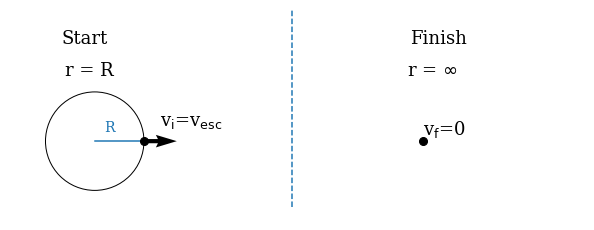

In [5]:
circle = Ellipse(np.array([-10,0]),width=3, height=3,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111,aspect=1)
ax1.add_artist(circle)
ax1.plot([-10,-10+1.5],[0,0],color='C0')
ax1.text(-9.7,0.3,'R',fontsize=14,color='C0')
ax1.text(-11.,3,'Start',fontsize=18)
ax1.text(-10.9,2,r'r = R',fontsize=18)
ax1.text(-0.4,3,'Finish',fontsize=18)
ax1.text(-0.5,2,'r = $\infty$',fontsize=18)
ax1.plot(0,0,'ko',ms=8)
ax1.text(0,0.2,'v$_\mathrm{f}$=0',fontsize=18)
ax1.text(-8,0.5,'v$_\mathrm{i}$=v$_\mathrm{esc}$',fontsize=18)
ax1.quiver([-10+1.5], [0], [1], [0], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.plot(-10+1.5,0,'ko',ms=8)

ax1.set_xlim(-12,5)
ax1.set_ylim(-2,4)
ax1.axvline(-4,linestyle='--')

ax1.set_axis_off()
fig.savefig(fig_dir+'Fig08x02.eps',bbox_inches='tight')

## Figure 8.3: Maxwell-Boltzmann

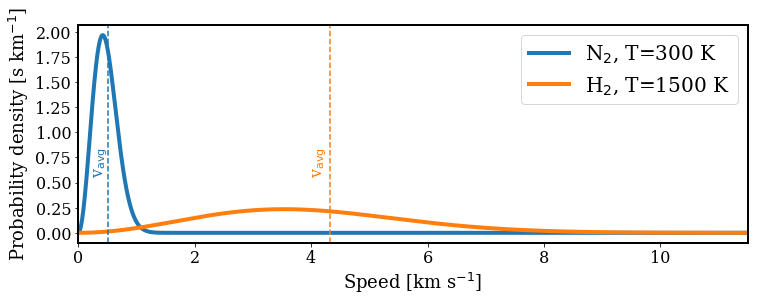

In [6]:
amu=1.66e-27  #kg

m=28.*amu  #kg
T=300.      #K
k=1.38064852e-23   #m^2 kg s^-2 K^-1
v=np.arange(0,20,0.01)*1e3   #m/s

def maxwell_boltzmann(v,mass=28.*1.66e-27,T=300):
    k=1.38064852e-23   #m^2 kg s^-2 K^-1
    return (mass/(2*np.pi*k*T))**(1.5) * 4*np.pi*(v**2.) *np.exp((-mass*v**2.)/(2*k*T))

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(111)
ax1.plot(v/1e3,maxwell_boltzmann(v)*1e3,linewidth=4,label=r'N$_2$, T=300 K')
ax1.plot(v/1e3,maxwell_boltzmann(v,mass=2*1.66e-27,T=1500)*1e3,linewidth=4,color='C1',label=r'H$_2$, T=1500 K')

ax1.set_xlim(0,11.5)
ax1.set_xlabel('Speed [km s$^{-1}$]',fontsize=18)
ax1.set_ylabel('Probability density [s km$^{-1}$]',fontsize=18)

for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('medium')
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('medium')
ax1.axvline(0.5196,color='C0',linestyle='--')
ax1.axvline(4.324,color='C1',linestyle='--')
ax1.text(4,0.75,r'v$_\mathrm{avg}$',color='C1',rotation=90,fontsize=16)
ax1.text(0.25, 0.75,r'v$_\mathrm{avg}$',color='C0',rotation=90,fontsize=16)
ax1.legend(fontsize=20)
fig.savefig(fig_dir+'Fig08x03.eps',bbox_inches='tight')

## Figure 8.4: Escape speed for planets and thermal speeds

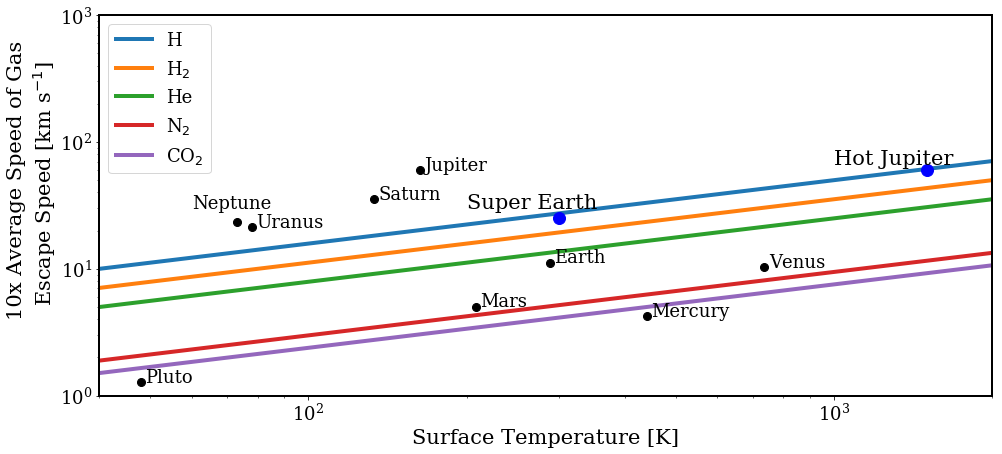

In [8]:
planet_data=pd.read_csv(data_dir+'planet_data.csv')

name=planet_data['Name'][0:9]
mass_planets=planet_data['Mass'][0:9]
R_planets=planet_data['Diameter'][0:9]/2.
v_esc=np.sqrt(2*G.value*mass_planets/R_planets)*1e-3  #km/s
T_surf=planet_data['Mean Temperature'][0:9]

T_list=np.arange(10,2000,10)
R=8.314
v_avg_H=np.sqrt(3*R*T_list/1.e-3)*1e-3  #km/s
v_avg_He=np.sqrt(3*R*T_list/4.e-3)*1e-3  #km/s
v_avg_H2=np.sqrt(3*R*T_list/2.e-3)*1e-3  #km/s
v_avg_N2=np.sqrt(3*R*T_list/28.e-3)*1e-3  #km/s
v_avg_CO2=np.sqrt(3*R*T_list/44.e-3)*1e-3  #km/s

fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)

ax1.plot(T_surf, v_esc, 'ko',ms=8)
for i,myname in enumerate(name):
    if(myname != 'Neptune'):
        ax1.text(T_surf[i]*1.02, v_esc[i], myname, fontsize=18)
ax1.text(60,30,'Neptune',fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
fig.text(0.065,0.75,'Escape Speed [km s$^{-1}$] ', fontsize=21,rotation=90)
fig.text(0.045,0.8,'10x Average Speed of Gas', fontsize=21,rotation=90)
ax1.set_xlabel('Surface Temperature [K]', fontsize=21)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1,1000)
ax1.set_xlim(40,2e3)

ax1.plot(T_list, v_avg_H*10., label='H',lw=4)
ax1.plot(T_list, v_avg_H2*10., label=r'H$_2$',lw=4)
ax1.plot(T_list, v_avg_He*10., label='He',lw=4)
ax1.plot(T_list, v_avg_N2*10., label=r'N$_2$',lw=4)
ax1.plot(T_list, v_avg_CO2*10., label=r'CO$_2$',lw=4)

R_HJ=71492e3  #m
M_HJ=1.898e27 #kg
vesc_HJ=np.sqrt(2.*G*M_HJ/R_HJ)
ax1.plot(1500,vesc_HJ/1e3, 'bo',markersize=12)
ax1.text(999,67, 'Hot Jupiter',fontsize=21)

R_SE=2*6371e3  #m
M_SE=6e25 #kg
vesc_SE=np.sqrt(2.*G*M_SE/R_SE)
ax1.plot(300,vesc_SE/1e3, 'bo',markersize=12)
ax1.text(200,30, 'Super Earth',fontsize=21)

ax1.legend(loc=2,fontsize=18)
fig.savefig(fig_dir+'Fig08x04.eps',bbox_inches='tight')

## Figure 8.5: Composition of planets

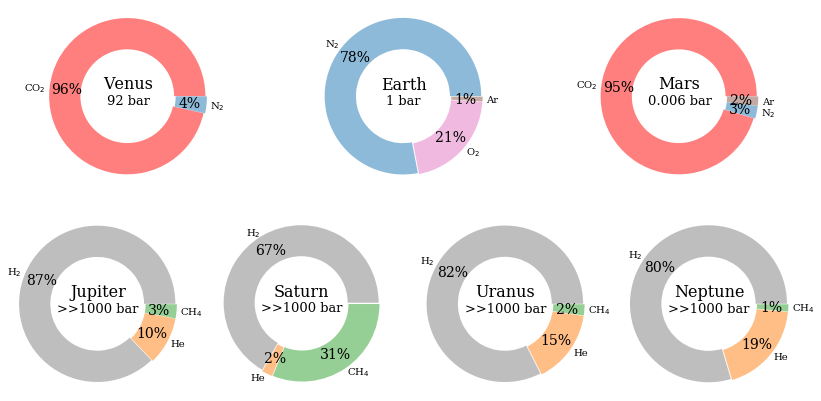

In [9]:
fig=plt.figure(figsize=(14,7))

names=['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

#Venus
labels_Venus = ['CO$_2$','N$_2$'] 
sizes_Venus = [96.5,3.5] 
ax2=fig.add_subplot(231,aspect=1)
explode = [0.01,0.01]
ax2.pie(sizes_Venus, labels=labels_Venus, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['red','C0'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.text(0, 0.1, 'Venus', ha='center',fontsize=16)
ax2.text(0,-0.1,'92 bar',ha='center',fontsize=13)

#Earth
labels_Earth = ['N$_2$','O$_2$','Ar'] 
sizes_Earth = [78.08,20.95,1.] 
ax3=fig.add_subplot(232,aspect=1)
explode = [0.01,0.01,0.01]
ax3.pie(sizes_Earth, labels=labels_Earth, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
        startangle=0,textprops={'fontsize': 14},colors=['C0','C6','C5'],pctdistance=0.78,
        labeldistance=1.05,explode=explode)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.text(0, 0.1, 'Earth', ha='center',fontsize=16)
ax3.text(0,-0.1,'1 bar',ha='center',fontsize=13)

#Mars
labels_Mars = ['CO$_2$','N$_2$','Ar'] 
sizes_Mars = [95.1,2.59,1.94] 
ax4=fig.add_subplot(233,aspect=1)
explode = [0.01,0.01,0.01]
ax4.pie(sizes_Mars, labels=labels_Mars, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['red','C0','C5'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.text(0, 0.1, 'Mars', ha='center',fontsize=16)
ax4.text(0,-0.1,'0.006 bar',ha='center',fontsize=13)

#Jupiter
labels_Jupiter = ['H$_2$','He','CH$_4$'] 
sizes_Jupiter = [89.8,10.2,3.] 
ax5=fig.add_subplot(245,aspect=1)
explode = [0.01,0.01,0.01]
ax5.pie(sizes_Jupiter, labels=labels_Jupiter, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['C7','C1','C2'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax5.text(0, 0.1, 'Jupiter', ha='center',fontsize=16)
ax5.text(0,-0.1,'>>1000 bar',ha='center',fontsize=13)

#Saturn
labels_Saturn = ['H$_2$','He','CH$_4$'] 
sizes_Saturn = [96.3,3.25,45.] 
ax6=fig.add_subplot(246,aspect=1)
explode = [0.01,0.01,0.01]
ax6.pie(sizes_Saturn, labels=labels_Saturn, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['C7','C1','C2'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax6.text(0, 0.1, 'Saturn', ha='center',fontsize=16)
ax6.text(0,-0.1,'>>1000 bar',ha='center',fontsize=13)

#Uranus
labels_Uranus = ['H$_2$','He','CH$_4$'] 
sizes_Uranus = [82.5,15.2,2.3] 
ax7=fig.add_subplot(247,aspect=1)
explode = [0.01,0.01,0.01]
ax7.pie(sizes_Uranus, labels=labels_Uranus, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['C7','C1','C2'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax7.text(0, 0.1, 'Uranus', ha='center',fontsize=16)
ax7.text(0,-0.1,'>>1000 bar',ha='center',fontsize=13)

#Neptune
labels_Neptune = ['H$_2$','He','CH$_4$'] 
sizes_Neptune = [80.0,19.0,1.5] 
explode = [0.01,0.01,0.01]
ax8=fig.add_subplot(248,aspect=1)
ax8.pie(sizes_Neptune, labels=labels_Neptune, autopct='%1.0f%%',wedgeprops=dict(width=0.4,alpha=0.5),
         startangle=0,textprops={'fontsize': 14},colors=['C7','C1','C2'],pctdistance=0.78,
       labeldistance=1.05,explode=explode)
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax8.text(0, 0.1, 'Neptune', ha='center',fontsize=16)
ax8.text(0,-0.1,'>>1000 bar',ha='center',fontsize=13)

fig.savefig(fig_dir+'Fig08x05.pdf',bbox_inches='tight',set_rasterized=True)

## Figure 8.6: Hydrostatic equilibrium setup

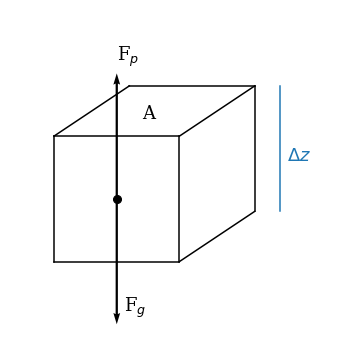

In [10]:
fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(111,aspect=1)
ax1.plot([0,5],[0,0],color='black')
ax1.plot([5,5],[0,5],color='black')
ax1.plot([0,5],[5,5],color='black')
ax1.plot([0,0],[0,5],color='black')
ax1.plot([0,3],[5,7],color='black')
ax1.plot([5,8],[5,7],color='black')
ax1.plot([3,8],[7,7],color='black')
ax1.plot([8,8],[2,7],color='black')
ax1.plot([5,8],[0,2],color='black')
ax1.text(3.5,5.7,'A',fontsize=18)
ax1.plot([9,9],[2,7],color='C0')
ax1.text(9.3,4,'$\Delta z$',color='C0',fontsize=18)
ax1.set_xlim(-1,11)
ax1.set_ylim(-3,10)

ax1.quiver([2.5], [2.5], [0], [5], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([2.5], [2.5], [0], [-5], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.plot(2.5,2.5,'ko',ms=8)
ax1.text(2.5,8,'F$_p$',fontsize=18)
ax1.text(2.8,-2,'F$_g$',fontsize=18)
ax1.set_axis_off()

fig.savefig(fig_dir+'Fig08x06.eps',bbox_inches='tight')

## Figure 8.8: Earth atmospheric temperature vs. altitude

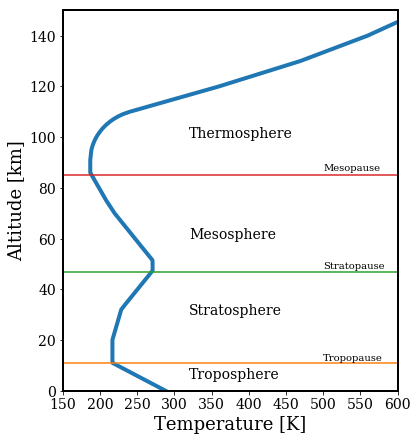

In [11]:
data=pd.read_csv(data_dir+'US_Standard_Atmosphere.csv')
temp=data['Temperature']
alt=data['Altitude']/1e3
notnan=np.isfinite(temp)
temp=temp[notnan]
alt=alt[notnan]

fig=plt.figure(figsize=(6,7))
ax1=fig.add_subplot(111)
ax1.plot(temp,alt,lw=4)
#ax1.plot(temp,alt,'r.')

ax1.set_xlim(150,600)
ax1.set_ylim(0,150)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('medium')
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('medium')
ax1.plot([0,1000],[11,11]) #Tropopause
ax1.plot([0,1000],[47,47]) #Stratopause
ax1.plot([0,1000],[85,85]) #Mesopause
ax1.text(320,5,'Troposphere',fontsize=14)
ax1.text(320,30,'Stratosphere',fontsize=14)
ax1.text(320,60,'Mesosphere',fontsize=14)
ax1.text(320,100,'Thermosphere',fontsize=14)

ax1.text(500,12,'Tropopause',fontsize=10)
ax1.text(500,48,'Stratopause',fontsize=10)
ax1.text(500,87,'Mesopause',fontsize=10)

ax1.set_xlabel('Temperature [K]',fontsize=18)
ax1.set_ylabel('Altitude [km]',fontsize=18)

fig.savefig(fig_dir+'Fig08x08.eps',bbox_inches='tight')

## Figure 8.9: Greenhouse effect

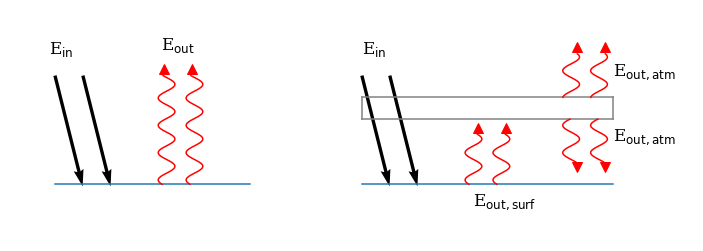

In [12]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(111)

#Left-hand side
ax1.plot([1,8],[2,2],color='C0')
ax1.quiver(1,7,1.25,-5,scale_units='xy',scale=1,width=0.005)
ax1.quiver(2,7,1.25,-5,scale_units='xy',scale=1,width=0.005)

y=np.linspace(2,7,100)
x1=np.sin(y*5.)*0.3+5
ax1.plot(x1,y,color='red')
ax1.plot(x1+1,y,color='red')
ax1.plot(4.9,7.3,'r^',ms=10)
ax1.plot(5.9,7.3,'r^',ms=10)

#Right-hand side
ax1.plot([12,21],[2,2],color='C0')
ax1.quiver(12,7,1.25,-5,scale_units='xy',scale=1,width=0.005)
ax1.quiver(13,7,1.25,-5,scale_units='xy',scale=1,width=0.005)
ax1.plot([12,21],[5,5],color='gray')
ax1.plot([12,21],[6,6],color='gray')
ax1.plot([12,12],[5,6],color='gray')
ax1.plot([21,21],[5,6],color='gray')

y2=np.linspace(2,4.3,100)
x2=np.sin(y2*5.)*0.3+16
ax1.plot(x2,y2,color='red')
ax1.plot(x2+1,y2,color='red')
ax1.plot(16.15,4.6,'r^',ms=10)
ax1.plot(17.15,4.6,'r^',ms=10)
y3=np.linspace(6,8,100)
x3=np.sin(y3*5.)*0.3+19.5
ax1.plot(x3,y3,color='red')
ax1.plot(x3+1,y3,color='red')
y4=np.linspace(3,5,100)
x4=np.sin(y4*5.)*0.3+19.5
ax1.plot(x4,y4,color='red')
ax1.plot(x4+1,y4,color='red')
ax1.plot(19.7,8.3,'r^',ms=10)
ax1.plot(20.7,8.3,'r^',ms=10)
ax1.plot(19.7,2.8,'rv',ms=10)
ax1.plot(20.7,2.8,'rv',ms=10)

ax1.text(0.8,8,r'E$_\mathrm{in}$',fontsize=17)
ax1.text(4.8,8.2,r'E$_\mathrm{out}$',fontsize=17)
ax1.text(12,8,r'E$_\mathrm{in}$',fontsize=17)
ax1.text(21,4,r'E$_\mathrm{out, atm}$',fontsize=17)
ax1.text(21,7,r'E$_\mathrm{out, atm}$',fontsize=17)
ax1.text(16,1,r'E$_\mathrm{out, surf}$',fontsize=17)

ax1.set_xlim(0,24)
ax1.set_ylim(0,10)
ax1.set_axis_off()

fig.savefig(fig_dir+'Fig08x09.eps',bbox_inches='tight')

## Figure 8.10: Mauna Loa CO2


/Users/csalyk/anaconda/lib/python3.5/site-packages/numpy/lib/npyio.py:2242: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


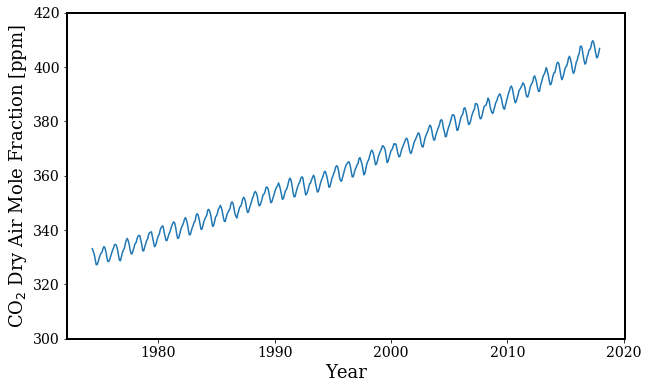

In [13]:
mynames=['site_code','year','month','day','hour','minute','second', 'value','value_std_dev','nvalue','latitude','longitude','altitude','elevation','intake_height','qcflag']
out=np.recfromtxt(data_dir+'co2_maunaloa.txt',names=mynames,skip_header=148)
decimal_year=out['year']+(out['month']-1)/12.
nontnan=out['value']>0

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(decimal_year, out['value'])
ax1.set_ylim(300,420)
ax1.set_ylabel('CO$_2$ Dry Air Mole Fraction [ppm]',fontsize=18)
ax1.set_xlabel('Year',fontsize=18)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('medium')
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('medium')
fig.savefig(fig_dir+'Fig08x10.eps',bbox_inches='tight')

## Figure 8.11: Simple atmospheric circulation (Hadley cell)

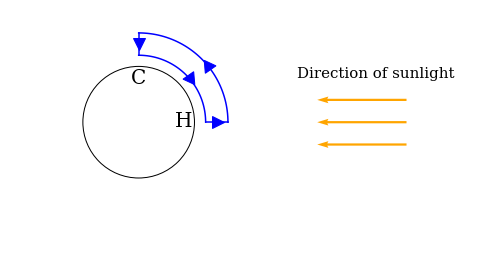

In [14]:
circle = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(111, aspect=1)
ax1.add_artist(circle)
ax1.set_xlim(0,20)
ax1.set_ylim(0,10)

theta=np.linspace(0,np.pi/2.,50)
x1=4*np.cos(theta)+5
y1=4*np.sin(theta)+5.
ax1.plot(x1,y1,color='blue')
x2=3*np.cos(theta)+5
y2=3*np.sin(theta)+5.
ax1.plot(x2,y2,color='blue')
ax1.plot([5,5],[8,9],color='blue')
ax1.plot([8,9],[5,5],color='blue')
ax1.plot(8.1,7.5,marker=(3, 0, 35),ms=15,color='blue')
ax1.plot(7.3,7,marker=(3, 0, -25),ms=15,color='blue')
ax1.plot(8.55,5,'b>',ms=12)
ax1.plot(5,8.5,'bv',ms=12)
ax1.text(4.65,6.7,'C',fontsize=20)
ax1.text(6.6,4.8,'H',fontsize=20)

ax1.quiver(17,6,-4,0,scale_units='xy',scale=1,width=0.005,color='orange')
ax1.quiver(17,5,-4,0,scale_units='xy',scale=1,width=0.005,color='orange')
ax1.quiver(17,4,-4,0,scale_units='xy',scale=1,width=0.005,color='orange')
ax1.text(12.1,7,'Direction of sunlight',fontsize=15)

ax1.set_axis_off()

fig.savefig(fig_dir+'Fig08x11.eps',bbox_inches='tight')

## Fig 8.12: Angular momentum on sphere

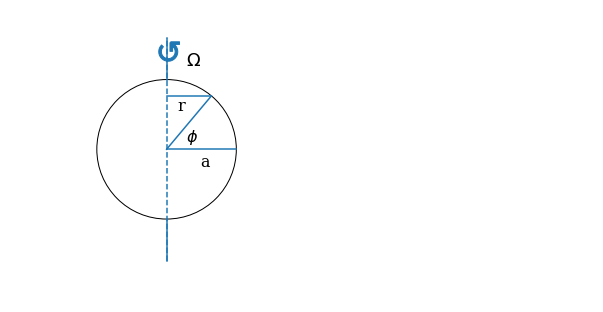

In [15]:
circle = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(111, aspect=1)
ax1.add_artist(circle)
ax1.set_xlim(0,20)
ax1.set_ylim(0,10)
ax1.plot([5,5],[1,9],'--',color='C0')
ax1.plot([5,5],[1,2.5],'-',color='C0')
ax1.plot([5,5],[7.5,9],'-',color='C0')

ax1.plot([5,7.5],[5,5],color='C0')
ax1.plot([5,5+2.5*np.cos(50.*np.pi/180.)],[5,5+2.5*np.sin(50.*np.pi/180.)],color='C0')
ax1.text(6.2,4.4,'a',fontsize=16)
ax1.text(5.7,5.3,r'$\phi$',fontsize=16)
ax1.plot([5,5+2.5*np.cos(50.*np.pi/180.)],[5+2.5*np.sin(50.*np.pi/180.),5+2.5*np.sin(50.*np.pi/180.)],color='C0')
ax1.text(5.4,6.4,'r',fontsize=16)
ax1.text(5.7,8,'$\Omega$',fontsize=18)
ax1.plot([5],[8.5],marker=r'$\circlearrowleft$',ms=24,color='C0')
ax1.set_axis_off()
fig.savefig(fig_dir+'Fig08x12.eps',bbox_inches='tight')

## Fig 8.13: Wind patterns due to angular momentum conservation

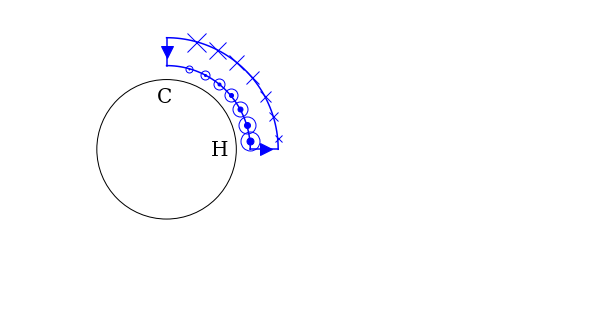

In [16]:
circle = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(111, aspect=1)
ax1.add_artist(circle)
ax1.set_xlim(0,20)
ax1.set_ylim(0,10)

theta=np.linspace(0,np.pi/2.,50)
x1=4*np.cos(theta)+5
y1=4*np.sin(theta)+5.
ax1.plot(x1,y1,color='blue')
x2=3*np.cos(theta)+5
y2=3*np.sin(theta)+5.
ax1.plot(x2,y2,color='blue')
ax1.plot([5,5],[8,9],color='blue')
ax1.plot([8,9],[5,5],color='blue')

ax1.plot(8.55,5,'b>',ms=12)
ax1.plot(5,8.5,'bv',ms=12)
ax1.text(4.65,6.7,'C',fontsize=20)
ax1.text(6.6,4.8,'H',fontsize=20)
ax1.plot(4*np.cos(0.1)+5,4*np.sin(0.1)+5.,'x',color='blue',ms=7)
ax1.plot(4*np.cos(0.3)+5,4*np.sin(0.3)+5.,'x',color='blue',ms=9)
ax1.plot(4*np.cos(0.5)+5,4*np.sin(0.5)+5.,'x',color='blue',ms=11)
ax1.plot(4*np.cos(0.7)+5,4*np.sin(0.7)+5.,'x',color='blue',ms=13)
ax1.plot(4*np.cos(0.9)+5,4*np.sin(0.9)+5.,'x',color='blue',ms=15)
ax1.plot(4*np.cos(1.1)+5,4*np.sin(1.1)+5.,'x',color='blue',ms=17)
ax1.plot(4*np.cos(1.3)+5,4*np.sin(1.3)+5.,'x',color='blue',ms=19)

ax1.plot(3*np.cos(0.1)+5,3*np.sin(0.1)+5.,'o',color='blue',ms=19,fillstyle='none')
ax1.plot(3*np.cos(0.3)+5,3*np.sin(0.3)+5.,'o',color='blue',ms=17,fillstyle='none')
ax1.plot(3*np.cos(0.5)+5,3*np.sin(0.5)+5.,'o',color='blue',ms=15,fillstyle='none')
ax1.plot(3*np.cos(0.7)+5,3*np.sin(0.7)+5.,'o',color='blue',ms=13,fillstyle='none')
ax1.plot(3*np.cos(0.9)+5,3*np.sin(0.9)+5.,'o',color='blue',ms=11,fillstyle='none')
ax1.plot(3*np.cos(1.1)+5,3*np.sin(1.1)+5.,'o',color='blue',ms=9,fillstyle='none')
ax1.plot(3*np.cos(1.3)+5,3*np.sin(1.3)+5.,'o',color='blue',ms=7,fillstyle='none')

ax1.plot(3*np.cos(0.1)+5,3*np.sin(0.1)+5.,'o',color='blue',ms=7)
ax1.plot(3*np.cos(0.3)+5,3*np.sin(0.3)+5.,'o',color='blue',ms=6)
ax1.plot(3*np.cos(0.5)+5,3*np.sin(0.5)+5.,'o',color='blue',ms=5)
ax1.plot(3*np.cos(0.7)+5,3*np.sin(0.7)+5.,'o',color='blue',ms=4)
ax1.plot(3*np.cos(0.9)+5,3*np.sin(0.9)+5.,'o',color='blue',ms=3)
ax1.plot(3*np.cos(1.1)+5,3*np.sin(1.1)+5.,'o',color='blue',ms=2)
ax1.plot(3*np.cos(1.3)+5,3*np.sin(1.3)+5.,'o',color='blue',ms=1)
ax1.set_axis_off()
fig.savefig(fig_dir+'Fig08x13.eps',bbox_inches='tight')

## Fig 8.14: Terrestrial planet circulation

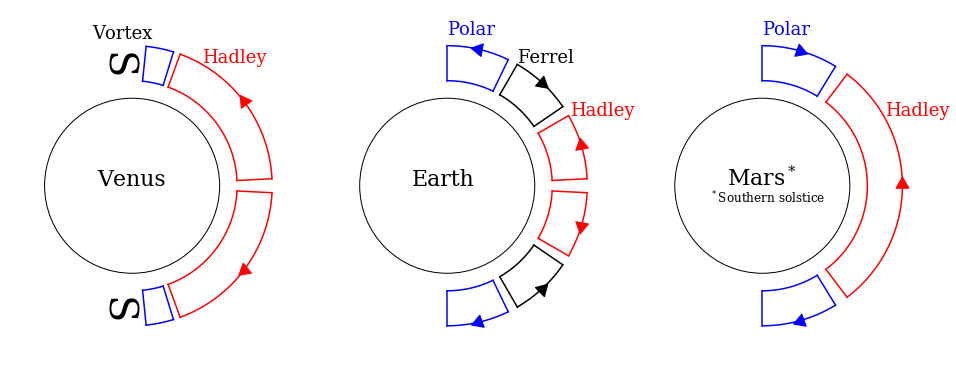

In [17]:
Venus = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  
Earth = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  
Mars = Ellipse(np.array([5,5]),width=5, height=5,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(16,14))

#Venus
ax1=fig.add_subplot(131, aspect=1)
ax1.add_artist(Venus)
ax1.set_xlim(2,9.5)
ax1.set_ylim(0,10)
#Hadley cell: North
theta=np.linspace(0.05,np.pi/2.-0.35,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax1.plot(xleft,yleft,color='red')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax1.plot(xright,yright,color='red')
ax1.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='red')
ax1.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='red')
ax1.plot(xright[25],yright[25],marker=(3, 0, 35),ms=15,color='red')
#Hadley cell: South
yleft=5-3*np.sin(theta)
ax1.plot(xleft,yleft,color='red')
yright=5-4*np.sin(theta)
ax1.plot(xright,yright,color='red')
ax1.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='red')
ax1.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='red')
ax1.plot(xright[25],yright[25],marker=(3, 0, 10),ms=15,color='red')
#Polar collar: North
theta=np.linspace(np.pi/2-0.3,np.pi/2.-0.1,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax1.plot(xleft,yleft,color='blue')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax1.plot(xright,yright,color='blue')
ax1.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax1.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
#Polar collar: South
yleft=5-3*np.sin(theta)
ax1.plot(xleft,yleft,color='blue')
yright=5-4*np.sin(theta)
ax1.plot(xright,yright,color='blue')
ax1.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax1.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
#Polar vortex: North
ax1.text(4,8,r'S',fontsize=40,rotation=270)
ax1.text(4,1,r'S',fontsize=40,rotation=270)
ax1.text(4,5,"Venus",fontsize=22)
#--------------------------------------------------------------------------------
#Earth
ax2=fig.add_subplot(132, aspect=1)
ax2.add_artist(Earth)
ax2.set_xlim(2,9.5)
ax2.set_ylim(0,10)
ax2.text(4,5,"Earth",fontsize=22)
#Hadley cell: North
theta=np.linspace(0.05,0.524,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax2.plot(xleft,yleft,color='red')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax2.plot(xright,yright,color='red')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='red')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='red')
ax2.plot(xright[25],yright[25],marker=(3, 0, 10),ms=15,color='red')
#Hadley cell: South
yleft=5-3*np.sin(theta)
ax2.plot(xleft,yleft,color='red')
yright=5-4*np.sin(theta)
ax2.plot(xright,yright,color='red')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='red')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='red')
ax2.plot(xright[25],yright[25],marker=(3, 0, 170),ms=15,color='red')
#Ferrel cell: North
theta=np.linspace(0.6,1.047,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax2.plot(xleft,yleft,color='black')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax2.plot(xright,yright,color='black')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='black')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='black')
ax2.plot(xright[25],yright[25],marker=(3, 0, -10),ms=15,color='black')
#Ferrel cell: South
yleft=5-3*np.sin(theta)
ax2.plot(xleft,yleft,color='black')
yright=5-4*np.sin(theta)
ax2.plot(xright,yright,color='black')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='black')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='black')
ax2.plot(xright[25],yright[25],marker=(3, 0, -45),ms=15,color='black')
#Polar cell: North
theta=np.linspace(1.12,np.pi/2.,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax2.plot(xleft,yleft,color='blue')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax2.plot(xright,yright,color='blue')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
ax2.plot(xright[25],yright[25],marker=(3, 0, 80),ms=15,color='blue')
#Polar cell: South
yleft=5-3*np.sin(theta)
ax2.plot(xleft,yleft,color='blue')
yright=5-4*np.sin(theta)
ax2.plot(xright,yright,color='blue')
ax2.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax2.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
ax2.plot(xright[25],yright[25],marker=(3, 0, -10),ms=15,color='blue')
#--------------------------------------------------------------------------------
#Mars
ax3=fig.add_subplot(133, aspect=1)
ax3.add_artist(Mars)
ax3.set_xlim(2,9.5)
ax3.set_ylim(0,10)
ax3.text(4,5,r"Mars$^*$",fontsize=22)
ax3.text(3.5,4.5,r"$^*$Southern solstice",fontsize=12)
#Hadley cell
theta=np.linspace(-np.pi/2.+0.65,np.pi/2.-0.65,100)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax3.plot(xleft,yleft,color='red')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax3.plot(xright,yright,color='red')
ax3.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='red')
ax3.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='red')
ax3.plot(xright[50],yright[50],marker=(3, 0, 0),ms=15,color='red')
#Polar cell: North
theta=np.linspace(np.pi/2.-0.55,np.pi/2.,50)
xleft=5+3*np.cos(theta)
yleft=5+3*np.sin(theta)
ax3.plot(xleft,yleft,color='blue')
xright=5+4*np.cos(theta)
yright=5+4*np.sin(theta)
ax3.plot(xright,yright,color='blue')
ax3.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax3.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
ax3.plot(xright[25],yright[25],marker=(3, 0, -110),ms=15,color='blue')
#Polar cell: South
yleft=5-3*np.sin(theta)
ax3.plot(xleft,yleft,color='blue')
yright=5-4*np.sin(theta)
ax3.plot(xright,yright,color='blue')
ax3.plot([xleft[0],xright[0]],[yleft[0],yright[0]],color='blue')
ax3.plot([xleft[-1],xright[-1]],[yleft[-1],yright[-1]],color='blue')
ax3.plot(xright[25],yright[25],marker=(3, 0, 110),ms=15,color='blue')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

ax1.text(7,8.5,'Hadley',fontsize=18,color='red')
ax1.text(3.85,9.2,'Vortex',fontsize=18,color='black')

ax2.text(7,8.5,'Ferrel',fontsize=18,color='black')
ax2.text(5,9.3,'Polar',fontsize=18,color='blue')
ax3.text(5,9.3,'Polar',fontsize=18,color='blue')
ax3.text(8.5,7,'Hadley',fontsize=18,color='red')
ax2.text(8.5,7,'Hadley',fontsize=18,color='red')

fig.savefig(fig_dir+'Fig08x14.eps',bbox_inches='tight')

## Fig 8.15: Pressure gradient plus Coriolis

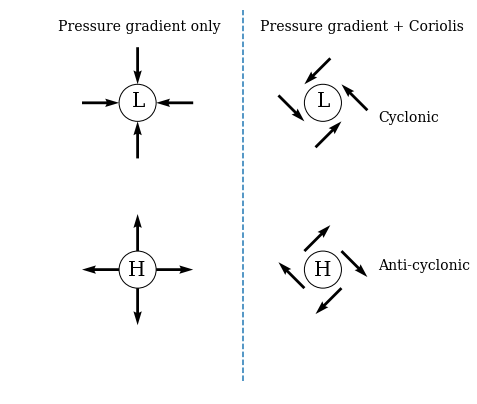

In [18]:
circle = Ellipse(np.array([5,5]),width=2, height=2,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  
circle2 = Ellipse(np.array([15,5]),width=2, height=2,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  
circle3 = Ellipse(np.array([5,-4]),width=2, height=2,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  
circle4 = Ellipse(np.array([15,-4]),width=2, height=2,
                 angle=0,facecolor='None',edgecolor='k',lw=1)  

fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(211, aspect=1)
ax1.add_artist(circle)
ax1.set_xlim(0,20)
ax1.set_ylim(-10,10)
ax1.text(4.7,4.8,'L',fontsize=20)
ax1.quiver([2], [5], [2], [0], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([8], [5], [-2], [0], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([5], [8], [0], [-2], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([5], [2], [0], [2], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.text(0.7,8.9,'Pressure gradient only',fontsize=14)
ax1.text(11.6,8.9,'Pressure gradient + Coriolis',fontsize=14)

ax1.add_artist(circle2)
ax1.text(14.7,4.8,'L',fontsize=20)
ax1.quiver([14-1.4], [4+1.4], [1.4], [-1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([16+1.4], [6-1.4], [-1.4], [1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([14+1.4], [6+1.4], [-1.4], [-1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([16-1.4], [4-1.4], [1.4], [1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.set_axis_off()

ax1.add_artist(circle3)
ax1.text(4.5,-4.3,'H',fontsize=20)
ax1.quiver([2+2], [-4], [-2], [0], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([8-2], [-4], [2], [0], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([5], [-4-1], [0], [-2], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([5], [-4+1], [0], [2], scale_units='xy',angles='xy',scale=1,lw=1)

ax1.add_artist(circle4)
ax1.text(14.5,-4.3,'H',fontsize=20)
ax1.quiver([14], [-5], [-1.4], [1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([16], [-3], [1.4], [-1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([14], [-3], [1.4], [1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.quiver([16], [-5], [-1.4], [-1.4], scale_units='xy',angles='xy',scale=1,lw=1)
ax1.axvline(10.7,linestyle='--')

ax1.text(18,4,'Cyclonic',fontsize=14)
ax1.text(18,-4,'Anti-cyclonic',fontsize=14)

fig.savefig(fig_dir+'Fig08x15.eps',bbox_inches='tight')